# Mercedes-Benz Greener Manufacturing

DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

Following actions should be performed:

If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split,KFold
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [2]:
#importing data
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
#checking the shape of dataset
train_data.shape

(4209, 378)

In [4]:
test_data.shape

(4209, 377)

In [5]:
#checking the categorical columns in dataset
def cat_type(y):
    for x in y.columns:
        if train_data[x].dtype=='object':
            print(x)
        
cat_type(train_data)

X0
X1
X2
X3
X4
X5
X6
X8


In [6]:
cat_type(test_data)

X0
X1
X2
X3
X4
X5
X6
X8


# Label Encoding the same in train and test dataset

In [7]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['X0'] = le.fit_transform(train_data.X0)
train_data['X1'] = le.fit_transform(train_data.X1)
train_data['X2'] = le.fit_transform(train_data.X2)
train_data['X3'] = le.fit_transform(train_data.X3)
train_data['X4'] = le.fit_transform(train_data.X4)
train_data['X5'] = le.fit_transform(train_data.X5)
train_data['X6'] = le.fit_transform(train_data.X6)
train_data['X8'] = le.fit_transform(train_data.X8)

In [8]:
train_data.shape

(4209, 378)

In [9]:
test_data['X0'] = le.fit_transform(test_data.X0)
test_data['X1'] = le.fit_transform(test_data.X1)
test_data['X2'] = le.fit_transform(test_data.X2)
test_data['X3'] = le.fit_transform(test_data.X3)
test_data['X4'] = le.fit_transform(test_data.X4)
test_data['X5'] = le.fit_transform(test_data.X5)
test_data['X6'] = le.fit_transform(test_data.X6)
test_data['X8'] = le.fit_transform(test_data.X8)

In [10]:
test_data.shape

(4209, 377)

In [11]:
#Visualization part 
train_visual=train_data.set_index('y')

count_final =train_visual[train_visual==1].stack().reset_index().drop(0, axis=1)
count_final

,y,level_1
0,130.81,X13
1,130.81,X18
2,130.81,X21
3,130.81,X31
4,130.81,X35
...,...,...
245524,110.85,X355
245525,110.85,X361
245526,110.85,X362
245527,110.85,X363


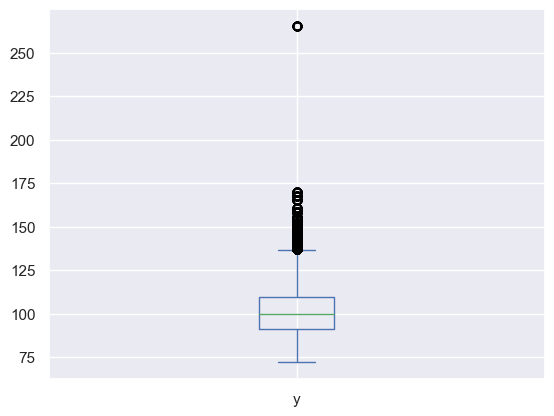

In [12]:
#undestanding the outliers 
count_final.plot(kind='box')
plt.show()

In [13]:
#removing the outliers
outlier=train_data[train_data['y'] > 130].index
print(outlier)
train_data.drop(outlier,inplace=True)
test_data.drop(outlier,inplace=True)

Int64Index([   0,   43,  203,  216,  225,  227,  253,  342,  420,  429,  523,
             648,  668,  681,  698,  846,  883,  889,  900,  995,  998, 1033,
            1036, 1060, 1141, 1203, 1205, 1237, 1269, 1272, 1279, 1308, 1349,
            1427, 1459, 1551, 1627, 1667, 1712, 1730, 1908, 1922, 2240, 2263,
            2280, 2348, 2357, 2375, 2376, 2414, 2447, 2470, 2475, 2496, 2530,
            2532, 2555, 2697, 2735, 2736, 2852, 2887, 2888, 2905, 2983, 3028,
            3090, 3093, 3133, 3151, 3165, 3177, 3215, 3358, 3442, 3645, 3744,
            3773, 3980, 4176, 4186],
           dtype='int64')


In [14]:
train_data.shape

(4128, 378)

In [15]:
test_data.shape

(4128, 377)

# If for any column(s), the variance is equal to zero, then need to remove those variable(s).

In [16]:
train_data.var()

ID      5.957201e+06
y       1.234556e+02
X0      1.874589e+02
X1      7.297806e+01
X2      1.187460e+02
            ...     
X380    8.170575e-03
X382    7.693709e-03
X383    1.210066e-03
X384    4.843787e-04
X385    1.451727e-03
Length: 378, dtype: float64

In [17]:
test_data.var()

ID      5.886448e+06
X0      2.317382e+02
X1      7.310887e+01
X2      1.040533e+02
X3      3.161573e+00
            ...     
X380    7.932201e-03
X382    8.884992e-03
X383    4.843787e-04
X384    7.263920e-04
X385    1.693271e-03
Length: 377, dtype: float64

In [18]:
#getting the variance==0 features
var_zero=train_data.var()[train_data.var()==0].index
var_zero


Index(['X11', 'X93', 'X107', 'X204', 'X205', 'X233', 'X235', 'X236', 'X268',
       'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347'],
      dtype='object')

In [19]:
#droping those features whoes var==0
train_data.drop(var_zero,axis=1,inplace=True)
test_data.drop(var_zero,axis=1,inplace=True)

In [20]:
train_data.shape

(4128, 362)

In [21]:
test_data.shape

(4128, 361)

# Check for null and unique values for test and train sets.


In [22]:
print(train_data.isnull().sum().any())
print(test_data.isnull().sum().any())

False
False


In [23]:
# Checking the unique values for each column in train data
for i in train_data.columns:
    print(i,'**',train_data[i].unique())

ID ** [   6    7    9 ... 8412 8415 8417]
y ** [ 88.53  76.26  80.62 ...  85.71 108.77  87.48]
X0 ** [32 20 40  9 36 43 31 29 39 35 19 27 44 45  7  8 10 46 37 15 12 42  5  0
 26  6 25 13 24 22 14 30 38 21 18 23 41  4 16 34 33 17 11  3 28  2]
X1 ** [21 24 23  3 19 13 20  1  4  0  6  9 26 11 16 22 17 15 10 25  5  7 14 12
  8 18  2]
X2 ** [19 34 25 16 14 38  7  8 33  0 31  3 39 26 24  5 21  2 13 27 29 20 42 22
 12  9 41 18 40 11 43  6 36 10 28 17 30 37  4 32 23 35]
X3 ** [4 2 5 3 1 6 0]
X4 ** [3 1 0]
X5 ** [28 27 12 11 10 14 13  9  8  5  6  1  2  3  4  7 16 15 18 17 20 21 23 22
 25 26 19  0]
X6 ** [11  9  3  7  8  0  6  2 10  4  5  1]
X8 ** [14 23  4 13 18  0  7 15 12 10  3  8 21  9  1 16 22  6 24 11  5 20 17 19
  2]
X10 ** [0 1]
X12 ** [0 1]
X13 ** [0 1]
X14 ** [0 1]
X15 ** [0 1]
X16 ** [0 1]
X17 ** [0 1]
X18 ** [1 0]
X19 ** [0 1]
X20 ** [0 1]
X21 ** [0 1]
X22 ** [0 1]
X23 ** [0 1]
X24 ** [0 1]
X26 ** [0 1]
X27 ** [1 0]
X28 ** [0 1]
X29 ** [0 1]
X30 ** [0 1]
X31 ** [1 0]
X32 ** [0 1]
X33

In [24]:
# Checking the unique values for each column in train data
for i in test_data.columns:
    print(i,'**',test_data[i].unique())

ID ** [   2    3    4 ... 8413 8414 8416]
X0 ** [42 21 45 47 46 29 12 38 20  8 31 48  6 27  7 44 23 37 33 41  3 19 15 13
 17 36 34  0 28  5 32  4 22  9 18 14 40 11 43 35 26  1 16 25 30 10  2 39
 24]
X1 ** [ 3 23 13 20  1 19  0 10 17  4 16 14 26  6  9 24  8 12 25 21 22  5 11 18
 15  7  2]
X2 ** [ 8 17 34  4 38 24 26 10 33  0 16  6 37 32  9 23 14 13  2  5 29 30 27 15
 35 19 39 44 21 18 28 12 31 42  1 41 36 25  7  3 11 20 40]
X3 ** [0 5 2 4 3 6 1]
X4 ** [3 1 0 2]
X5 ** [ 9  0 31 30 29 14 13 12 16 15 11 10  6  7  2  3  4  5  8 18 17 20 19 22
 23 25 24 27 28 21  1]
X6 ** [ 6  9 11  8  3  5  7  0  2 10  4  1]
X8 ** [24  9 13 12 18  0 21 17 14 19  7  2 10 22 15 20  3  6  1  4 11  5 16  8
 23]
X10 ** [0 1]
X12 ** [0 1]
X13 ** [0 1]
X14 ** [0 1]
X15 ** [0 1]
X16 ** [0 1]
X17 ** [0 1]
X18 ** [0 1]
X19 ** [1 0]
X20 ** [0 1]
X21 ** [0 1]
X22 ** [0 1]
X23 ** [0 1]
X24 ** [0 1]
X26 ** [0 1]
X27 ** [1 0]
X28 ** [0 1]
X29 ** [0 1]
X30 ** [0 1]
X31 ** [1 0]
X32 ** [0 1]
X33 ** [0 1]
X34 ** [0 1]
X35 **

In [25]:
#splitting the data for scaling
xt=train_data.iloc[:,2:]
tx=test_data

In [26]:
#Scaling the data 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_training= sc.fit_transform(xt)
x_testing=sc.fit_transform(tx)

In [27]:
x_training.shape

(4128, 360)

In [28]:
x_testing.shape

(4128, 361)

# Perform dimensionality reduction.

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca_test=PCA(n_components=146)
x_t=pca.fit_transform(x_training)
t_x=pca_test.fit_transform(x_testing)

In [30]:
#training dataset after scaling
x_t.shape

(4128, 146)

In [31]:
#testing dataset after scaling
t_x.shape

(4128, 146)

In [32]:
#creating the dependent feature for our training dataset
y=train_data.y

In [33]:
y.shape

(4128,)

# Building XGBoost Regressor

In [34]:
#creating the instance and building the model
regressor=XGBRegressor(n_estimators=500,learning_rate=0.3,max_depth=5,objective='reg:linear',eval_metric= 'rmse')

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3096, 146)
(1032, 146)
(3096,)
(1032,)


In [36]:
#fiting the model
regressor.fit(x_train,y_train)

[19:13:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto', ...)

In [37]:
#predicting the model
y_predict=regressor.predict(x_test)
y_predict

array([106.1823 ,  95.83613, 113.16558, ...,  89.58843,  95.34689,
        90.77398], dtype=float32)

In [38]:
#actual y values for our test dataset
y_test

595     103.75
2243     97.22
4201    107.39
3994    107.44
817     100.59
         ...  
2481    128.87
3764     98.44
1738     92.94
1870     93.64
2354     88.18
Name: y, Length: 1032, dtype: float64

In [39]:
#Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
print('RMSE = ',sqrt(mean_squared_error(regressor.predict(x_test),y_test)))

RMSE =  7.931731907970579


# Predict test_data values using our regressor xgboost model

In [40]:
#prediction through our test data
X_new=pd.DataFrame(t_x)
regressor.predict(X_new)

array([ 96.12015 ,  82.027725,  80.86171 , ..., 104.02781 ,  99.692986,
        97.126595], dtype=float32)

In [41]:
#this is the RMSE score 
print('RMSE = ',sqrt(mean_squared_error(regressor.predict(X_new),y)))

RMSE =  13.22228551937848


# CONCLUSION

Insights-
1.	Removing low variance features contributes in increasing model performance.
2.	No null, unique and duplicates value found in the train and test dataset
3.	Hyperparameter tuning prevents the overfitting of model.
4.	Adding PCA featurization (try to keep 95% important data) which helps in dimensionality reduction of models, which    contributes in decreasing Rmse.
5.	Predicted the test_data using XGBoost.
